In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/diamonds_new_2.csv')

In [3]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [5]:
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>,
        <Axes: title={'center': 'price_new'}>]], dtype=object)

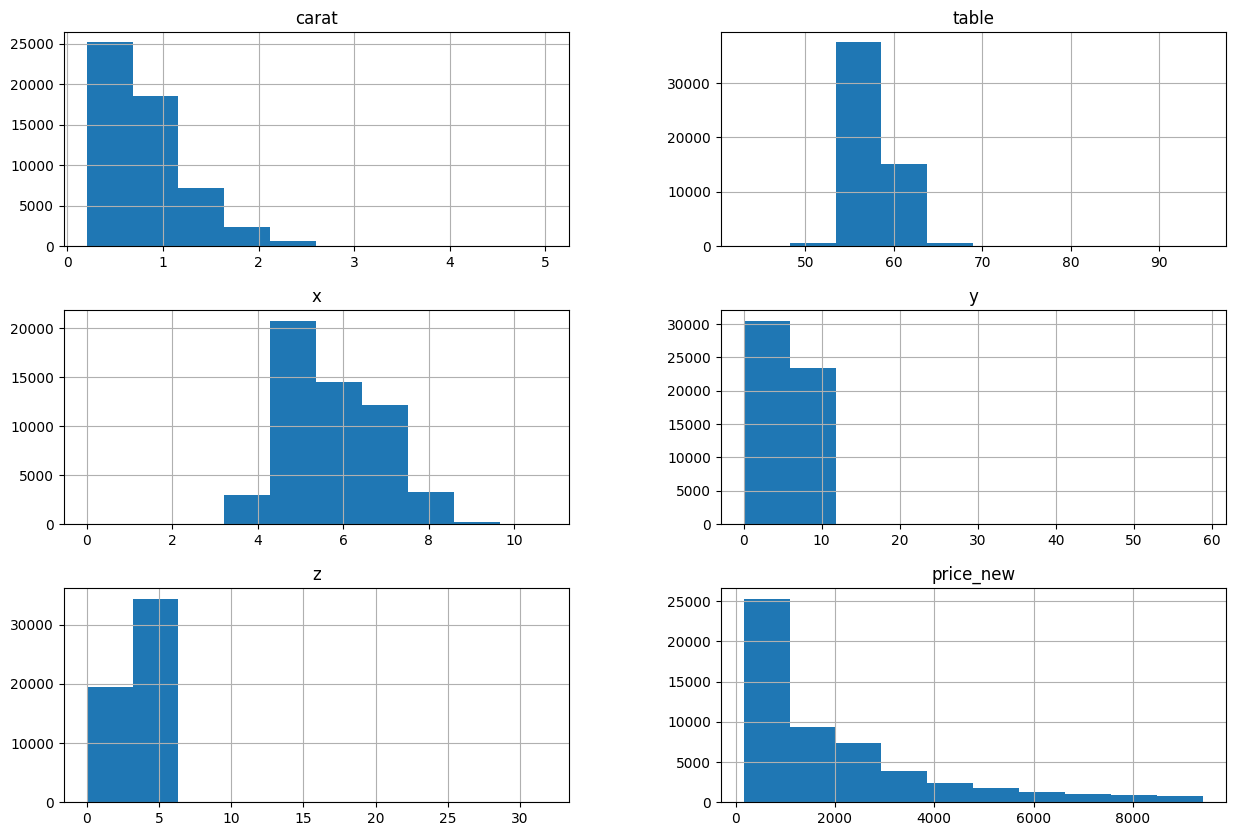

In [6]:
freqgraph = data.select_dtypes(include = 'float')
freqgraph.hist(figsize=(15,10))

In [7]:
data['carat'] = data['carat'].fillna(data['carat'].median())
data['table'] = data['table'].fillna(data['table'].mean())
data['color'] = data['color'].fillna(data['color'].mode()[0])

In [8]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

## **Finding Outliers**

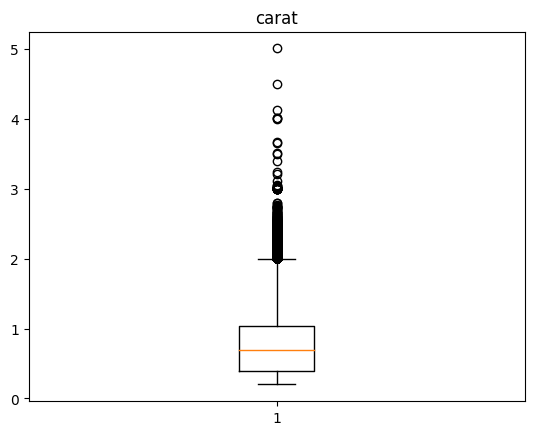

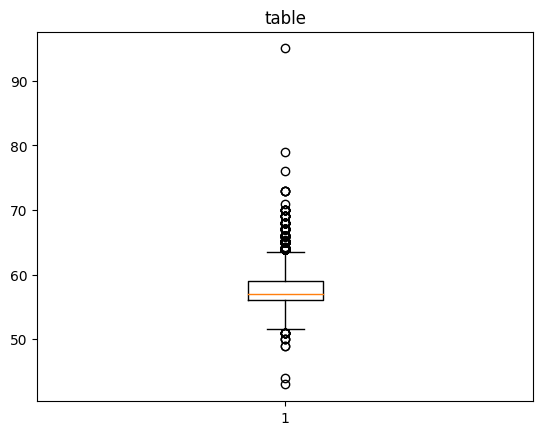

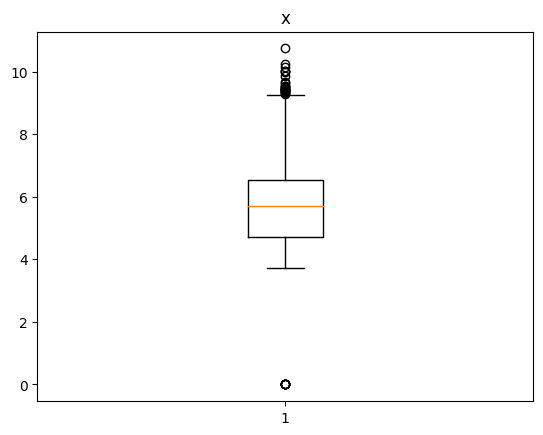

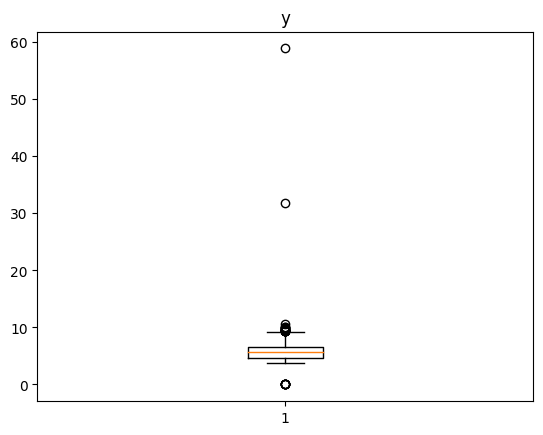

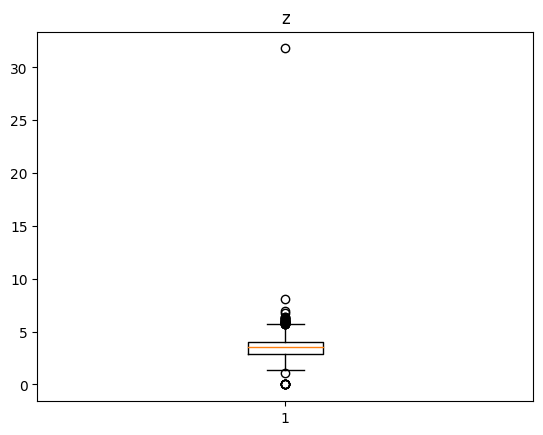

In [ ]:
numerical_col = ['carat','table','x','y','z']

for i in numerical_col:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()

In [ ]:
# colunm -'carat'

Q1 = data['carat'].quantile(0.25)
Q2 = data['carat'].quantile(0.50)
Q3 = data['carat'].quantile(0.75)

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q2 is: ",Q2)

Q1 is:  0.4
Q2 is:  0.7
Q2 is:  0.7


In [ ]:
IQR = Q3-Q1

print(IQR)

0.64


In [ ]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

print("lower whisker: ",lower_lim)
print("upper whisker: ",upper_lim)

lower whisker:  -0.5599999999999999
upper whisker:  2.0


In [ ]:
outlier =[]
for x in data['carat']:
  if((x<lower_lim) or (x>upper_lim)):
    outlier.append(x)

print(outlier)

[2.06, 2.14, 2.15, 2.22, 2.01, 2.01, 2.27, 2.03, 2.03, 2.06, 2.08, 2.49, 2.01, 2.14, 2.02, 2.02, 2.15, 2.03, 2.03, 2.07, 3.0, 2.21, 2.22, 2.01, 2.1, 2.1, 2.25, 2.01, 2.03, 2.17, 2.32, 2.72, 2.23, 2.11, 2.01, 2.05, 2.25, 2.27, 2.3, 2.31, 2.01, 2.04, 2.03, 2.12, 2.11, 2.5, 2.2, 2.01, 3.01, 3.0, 2.01, 2.01, 2.33, 2.04, 2.04, 2.68, 2.25, 2.5, 2.34, 2.02, 2.16, 2.5, 2.01, 2.74, 2.01, 2.16, 2.28, 2.25, 2.17, 2.02, 2.03, 2.04, 2.03, 2.01, 2.01, 2.01, 2.68, 2.43, 2.01, 2.04, 2.02, 2.01, 2.06, 2.01, 2.04, 3.11, 2.05, 2.05, 2.05, 2.02, 2.02, 2.04, 3.01, 2.06, 2.01, 2.09, 2.52, 2.19, 2.02, 2.09, 2.01, 2.01, 2.01, 2.01, 2.01, 2.04, 2.14, 2.18, 2.01, 2.01, 2.01, 2.02, 2.77, 2.63, 3.05, 2.1, 2.46, 2.01, 2.01, 2.02, 3.02, 2.63, 2.22, 2.02, 2.01, 2.01, 2.38, 2.06, 3.01, 2.01, 2.01, 2.01, 2.02, 3.0, 2.03, 2.01, 2.01, 2.24, 2.32, 2.01, 2.06, 2.3, 2.02, 2.2, 2.07, 2.01, 2.25, 2.01, 2.25, 2.01, 2.34, 2.02, 2.09, 2.2, 2.01, 2.02, 2.03, 2.01, 2.06, 2.04, 2.01, 2.34, 2.26, 2.06, 2.36, 2.04, 2.01, 2.01, 2.08,

In [ ]:
data['carat'] = data['carat'].clip(lower=lower_lim, upper=upper_lim)

In [ ]:
outlier =[]
for x in data['carat']:
  if((x<lower_lim) or (x>upper_lim)):
    outlier.append(x)

print(outlier)

[]


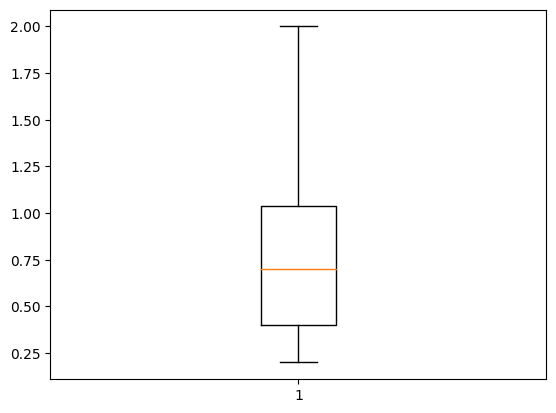

In [ ]:
plt.boxplot(data['carat'])
plt.show()

In [ ]:
# column -'table'

Q1 = data['table'].quantile(0.25)
Q2 = data['table'].quantile(0.50)
Q3 = data['table'].quantile(0.75)

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q2 is: ",Q2)

Q1 is:  56.0
Q2 is:  57.0
Q2 is:  57.0


In [ ]:
IQR = Q3-Q1

print(IQR)

3.0


In [ ]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

print("lower whisker: ",lower_lim)
print("upper whisker: ",upper_lim)

lower whisker:  51.5
upper whisker:  63.5


In [ ]:
outliers = []
for i in data['table']:
  if ((i<lower_lim) or (i>upper_lim)):
    outliers.append(i)

print(outliers)

[65.0, 69.0, 64.0, 64.0, 67.0, 64.0, 66.0, 70.0, 66.0, 68.0, 64.0, 64.0, 67.0, 67.0, 65.0, 70.0, 64.0, 69.0, 65.0, 64.0, 66.0, 64.0, 67.0, 67.0, 66.0, 64.0, 65.0, 66.0, 51.0, 67.0, 66.0, 66.0, 64.0, 65.0, 66.0, 65.0, 65.0, 64.0, 67.0, 65.0, 64.0, 66.0, 65.0, 68.0, 64.0, 64.0, 64.0, 65.0, 64.0, 66.0, 66.0, 66.0, 50.1, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 65.0, 64.0, 64.0, 51.0, 64.0, 65.0, 51.0, 64.0, 64.0, 66.0, 64.0, 64.0, 66.0, 65.0, 64.0, 64.0, 64.0, 65.0, 64.0, 67.0, 65.0, 65.0, 64.0, 65.0, 65.0, 65.0, 66.0, 65.0, 64.0, 65.0, 67.0, 66.0, 64.0, 68.0, 64.0, 65.0, 65.0, 64.0, 65.0, 64.0, 64.0, 66.0, 64.0, 64.0, 64.0, 66.0, 65.0, 49.0, 65.0, 66.0, 66.0, 67.0, 67.0, 65.0, 67.0, 66.0, 64.0, 65.0, 66.0, 67.0, 65.0, 64.0, 65.0, 65.0, 64.0, 64.0, 65.0, 64.0, 50.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 65.0, 66.0, 64.0, 64.0, 67.0, 64.0, 65.0, 68.0, 66.0, 65.0, 64.0, 64.0, 65.0, 64.0, 65.0, 65.0, 64.0, 51.0, 64.0, 66.0, 64.0, 65.0, 67.0, 64.0, 66.0, 66.0, 66.0, 64.0, 64.0, 68.0, 64.0, 64.0, 64.

In [ ]:
data['table'] = data['table'].clip(lower=lower_lim, upper=upper_lim)

In [ ]:
outliers = []
for i in data['table']:
  if ((i<lower_lim) or (i>upper_lim)):
    outliers.append(i)

print(outliers)

[]


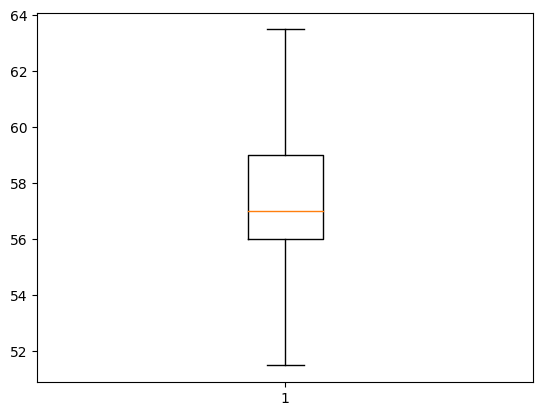

In [ ]:
plt.boxplot(data['table'])
plt.show()

In [ ]:
# column -'x'

Q1 = data['x'].quantile(0.25)
Q2 = data['x'].quantile(0.50)
Q3 = data['x'].quantile(0.75)

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q2 is: ",Q2)

Q1 is:  4.71
Q2 is:  5.7
Q2 is:  5.7


In [ ]:
IQR = Q3-Q1

print(IQR)

1.83


In [ ]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

print("lower whisker: ",lower_lim)
print("upper whisker: ",upper_lim)

lower whisker:  1.9649999999999999
upper whisker:  9.285


In [ ]:
outliers = []
for i in data['x']:
  if ((i<lower_lim) or (i>upper_lim)):
    outliers.append(i)

print(outliers)

[0.0, 0.0, 0.0, 9.54, 9.38, 9.53, 9.44, 9.49, 9.65, 0.0, 9.42, 9.44, 9.32, 10.14, 10.02, 0.0, 9.42, 10.01, 9.86, 9.3, 10.0, 10.74, 0.0, 9.36, 10.23, 9.51, 9.44, 9.66, 9.35, 9.41, 0.0, 0.0]


In [ ]:
data['x'] = data['x'].clip(lower=lower_lim, upper=upper_lim)

In [ ]:
outliers = []
for i in data['x']:
  if ((i<lower_lim) or (i>upper_lim)):
    outliers.append(i)

print(outliers)

[]


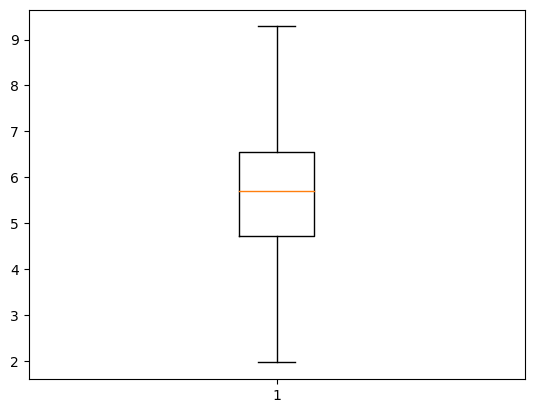

In [ ]:
plt.boxplot(data['x'])
plt.show()

In [ ]:
# column -'y'

Q1 = data['y'].quantile(0.25)
Q2 = data['y'].quantile(0.50)
Q3 = data['y'].quantile(0.75)

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q2 is: ",Q2)

Q1 is:  4.72
Q2 is:  5.71
Q2 is:  5.71


In [ ]:
IQR = Q3-Q1

print(IQR)

1.8200000000000003


In [ ]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

print("lower whisker: ",lower_lim)
print("upper whisker: ",upper_lim)

lower whisker:  1.9899999999999993
upper whisker:  9.27


In [ ]:
outliers = []
for i in data['y']:
  if ((i<lower_lim) or (i>upper_lim)):
    outliers.append(i)

print(outliers)

[0.0, 0.0, 9.38, 9.31, 9.48, 58.9, 9.4, 9.42, 9.59, 0.0, 9.37, 10.1, 9.94, 0.0, 9.34, 9.94, 9.81, 9.85, 10.54, 0.0, 9.31, 10.16, 9.46, 9.38, 9.63, 9.32, 31.8, 0.0, 0.0]


In [ ]:
data['y'] = data['y'].clip(lower=lower_lim, upper=upper_lim)

In [ ]:
outliers = []
for i in data['y']:
  if ((i<lower_lim) or (i>upper_lim)):
    outliers.append(i)

print(outliers)

[]


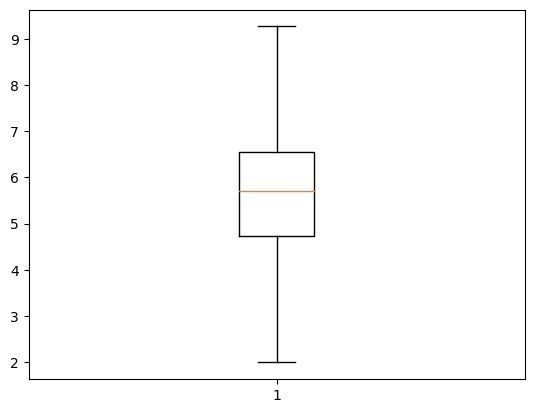

In [ ]:
plt.boxplot(data['y'])
plt.show()

In [24]:
# column -'z'

Q1 = data['z'].quantile(0.25)
Q2 = data['z'].quantile(0.50)
Q3 = data['z'].quantile(0.75)

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q2 is: ",Q2)

Q1 is:  2.91
Q2 is:  3.53
Q2 is:  3.53


In [25]:
IQR = Q3-Q1

print(IQR)

1.13


In [26]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

print("lower whisker: ",lower_lim)
print("upper whisker: ",upper_lim)

lower whisker:  1.2150000000000003
upper whisker:  5.734999999999999


In [28]:
outliers = []
for i in data['z']:
  if ((i<lower_lim) or (i>upper_lim)):
    outliers.append(i)

print(outliers)

[6.33, 5.85, 5.9, 5.76, 5.95, 5.78, 5.93, 5.75, 5.96, 5.85, 5.79, 5.87, 5.8, 5.81, 5.81, 6.11, 6.0, 5.84, 6.12, 5.82, 5.74, 5.75, 5.94, 5.76, 5.76, 6.07, 5.83, 5.97, 6.09, 5.99, 5.86, 5.9, 5.77, 5.91, 5.75, 5.81, 5.87, 5.76, 5.87, 5.76, 5.86, 5.76, 5.81, 5.83, 5.8, 5.82, 5.75, 5.89, 5.87, 5.83, 5.82, 5.77, 5.92, 5.89, 6.03, 5.88, 5.89, 5.78, 6.9, 5.74, 5.88, 5.84, 5.75, 5.82, 5.84, 5.76, 5.9, 5.75, 5.74, 5.97, 5.8, 5.84, 5.8, 5.93, 5.86, 6.36, 5.88, 5.99, 5.76, 5.94, 5.77, 5.75, 6.2, 5.85, 5.92, 5.77, 6.1, 5.87, 5.92, 6.21, 6.22, 5.77, 5.85, 5.94, 5.86, 6.45, 6.01, 5.75, 5.99, 5.88, 6.27, 5.94, 6.05, 5.74, 6.1, 5.78, 5.86, 5.75, 5.77, 5.75, 5.86, 6.06, 5.91, 5.76, 5.86, 5.82, 5.86, 5.96, 6.13, 6.55, 5.76, 6.01, 6.1, 5.75, 5.75, 5.81, 5.82, 5.9, 6.01, 6.05, 5.82, 5.91, 6.25, 6.02, 5.86, 6.11, 6.23, 6.08, 6.07, 6.02, 5.95, 5.8, 6.41, 5.76, 5.96, 5.87, 6.41, 6.34, 6.23, 5.79, 5.89, 5.81, 5.88, 5.77, 5.95, 6.15, 5.96, 5.77, 6.08, 5.77, 5.8, 5.84, 5.78, 5.77, 5.81, 5.75, 5.89, 5.94, 5.9, 5.

In [29]:
data['z'] = data['z'].clip(lower=lower_lim, upper=upper_lim)

In [30]:
outliers = []
for i in data['z']:
  if ((i<lower_lim) or (i>upper_lim)):
    outliers.append(i)

print(outliers)

[]


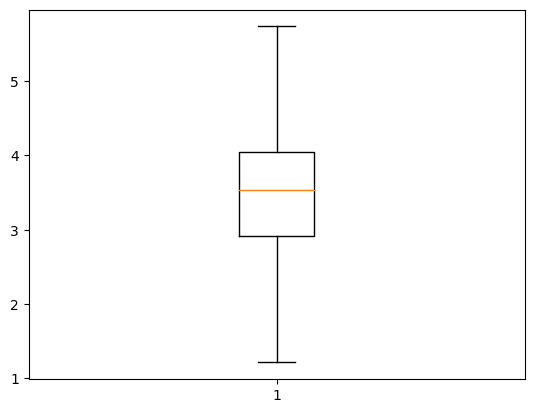

In [31]:
plt.boxplot(data['z'])
plt.show()

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53940 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


# **Encoding**

In [34]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [36]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [37]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

## **Label Encoding**

In [38]:
# column -'cut'

from sklearn.preprocessing import LabelEncoder

In [39]:
label_en  = LabelEncoder()

In [44]:
data['cut'] = label_en.fit_transform(data['cut'])
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,2,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,3,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,1,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,3,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,1,J,SI2,58.0,4.34,4.35,2.75,167.5


In [49]:
# column -'clarity'

label_en = LabelEncoder()
data['clarity'] = label_en.fit_transform(data['clarity'])

In [50]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,2,E,3,55.0,3.95,3.98,2.43,163.0
1,0.21,3,E,2,61.0,3.89,3.84,2.31,163.0
2,0.23,1,E,4,65.0,4.05,4.07,2.31,163.5
3,0.29,3,I,5,58.0,4.20,4.23,2.63,167.0
4,0.31,1,J,3,58.0,4.34,4.35,2.75,167.5


## **One hot encoding**

In [56]:
# column -'color'

data = pd.get_dummies(data)
data.head()

,carat,cut,clarity,table,x,y,z,price_new,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,2,3,55.0,3.95,3.98,2.43,163.0,0,1,0,0,0,0,0
1,0.21,3,2,61.0,3.89,3.84,2.31,163.0,0,1,0,0,0,0,0
2,0.23,1,4,65.0,4.05,4.07,2.31,163.5,0,1,0,0,0,0,0
3,0.29,3,5,58.0,4.20,4.23,2.63,167.0,0,0,0,0,0,1,0
4,0.31,1,3,58.0,4.34,4.35,2.75,167.5,0,0,0,0,0,0,1


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  int64  
 2   clarity    53940 non-null  int64  
 3   table      53940 non-null  float64
 4   x          53940 non-null  float64
 5   y          53940 non-null  float64
 6   z          53940 non-null  float64
 7   price_new  53940 non-null  float64
 8   color_D    53940 non-null  uint8  
 9   color_E    53940 non-null  uint8  
 10  color_F    53940 non-null  uint8  
 11  color_G    53940 non-null  uint8  
 12  color_H    53940 non-null  uint8  
 13  color_I    53940 non-null  uint8  
 14  color_J    53940 non-null  uint8  
dtypes: float64(6), int64(2), uint8(7)
memory usage: 3.7 MB


# **Scaling**

## **standard scaling**

In [59]:
data1 = data.drop(['cut','clarity','price_new','color_D','color_E','color_F','color_G','color_H','color_I','color_J'],axis=1)

In [60]:
data1

,carat,table,x,y,z
0,0.23,55.0,3.95,3.98,2.43
1,0.21,61.0,3.89,3.84,2.31
2,0.23,65.0,4.05,4.07,2.31
3,0.29,58.0,4.20,4.23,2.63
4,0.31,58.0,4.34,4.35,2.75
...,...,...,...,...,...
53935,0.72,57.0,5.75,5.76,3.50
53936,0.72,55.0,5.69,5.75,3.61
53937,0.70,60.0,5.66,5.68,3.56
53938,0.86,58.0,6.15,6.12,3.74


In [61]:
data1.describe()

,carat,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,57.457719,5.731157,5.734526,3.539131
std,0.474011,2.234436,1.121761,1.142135,0.691776
min,0.200000,43.000000,0.000000,0.000000,1.215000
25%,0.400000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,59.000000,6.540000,6.540000,4.040000
max,5.010000,95.000000,10.740000,58.900000,5.735000


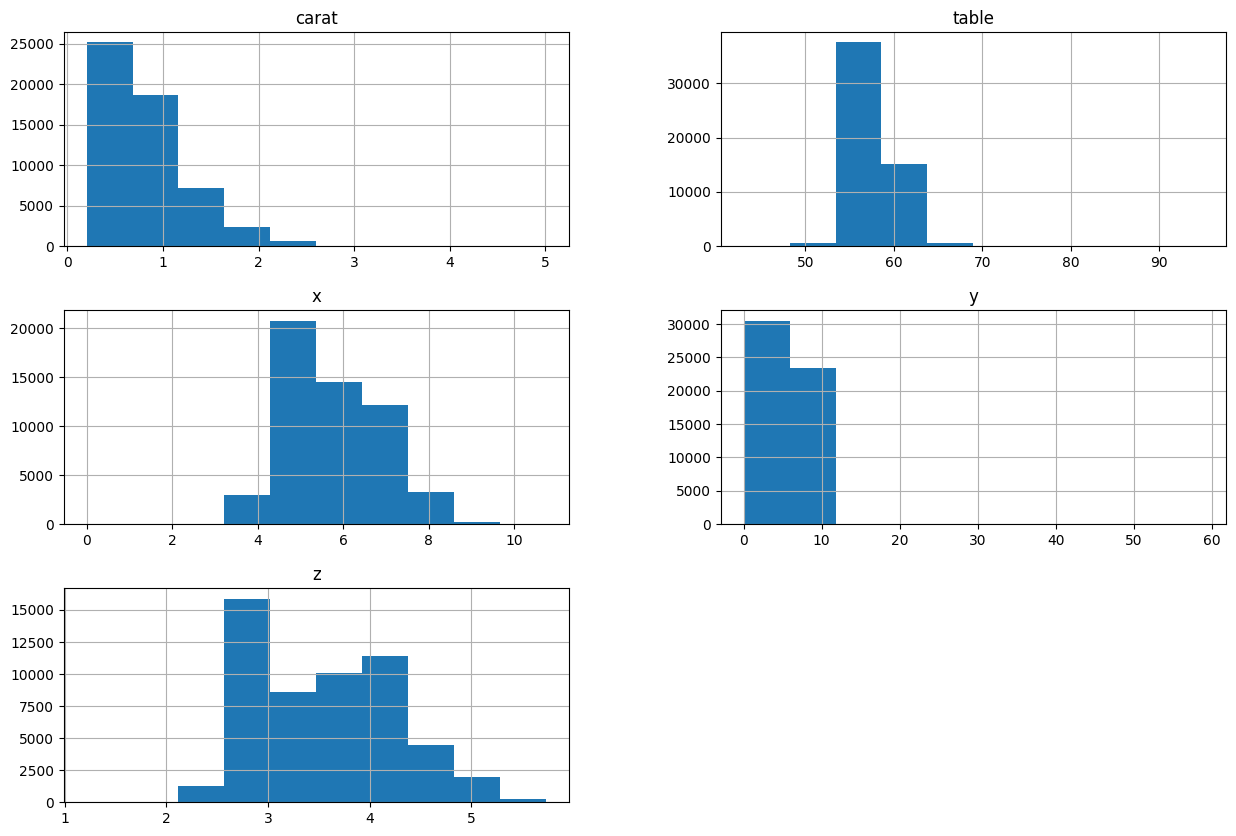

In [62]:
data1.hist(figsize=(15,10))
plt.show()

In [63]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc = StandardScaler()
data1_sc = sc.fit_transform(data1)

In [69]:
data1_sc = pd.DataFrame(data1_sc)

In [70]:
data1_sc.describe()

,0,1,2,3,4
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,2.444878e-16,-2.484924e-15,2.782103e-16,-8.430615e-17,-1.053827e-16
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.261458e+00,-6.470471e+00,-5.109120e+00,-5.020931e+00,-3.359688e+00
25%,-8.395232e-01,-6.523938e-01,-9.103248e-01,-8.882800e-01,-9.094515e-01
50%,-2.066210e-01,-2.048494e-01,-2.777553e-02,-2.147398e-02,-1.319971e-02
75%,5.106683e-01,6.902395e-01,7.210542e-01,7.052421e-01,7.240397e-01
max,8.886075e+00,1.680184e+01,4.465203e+00,4.654965e+01,3.174276e+00


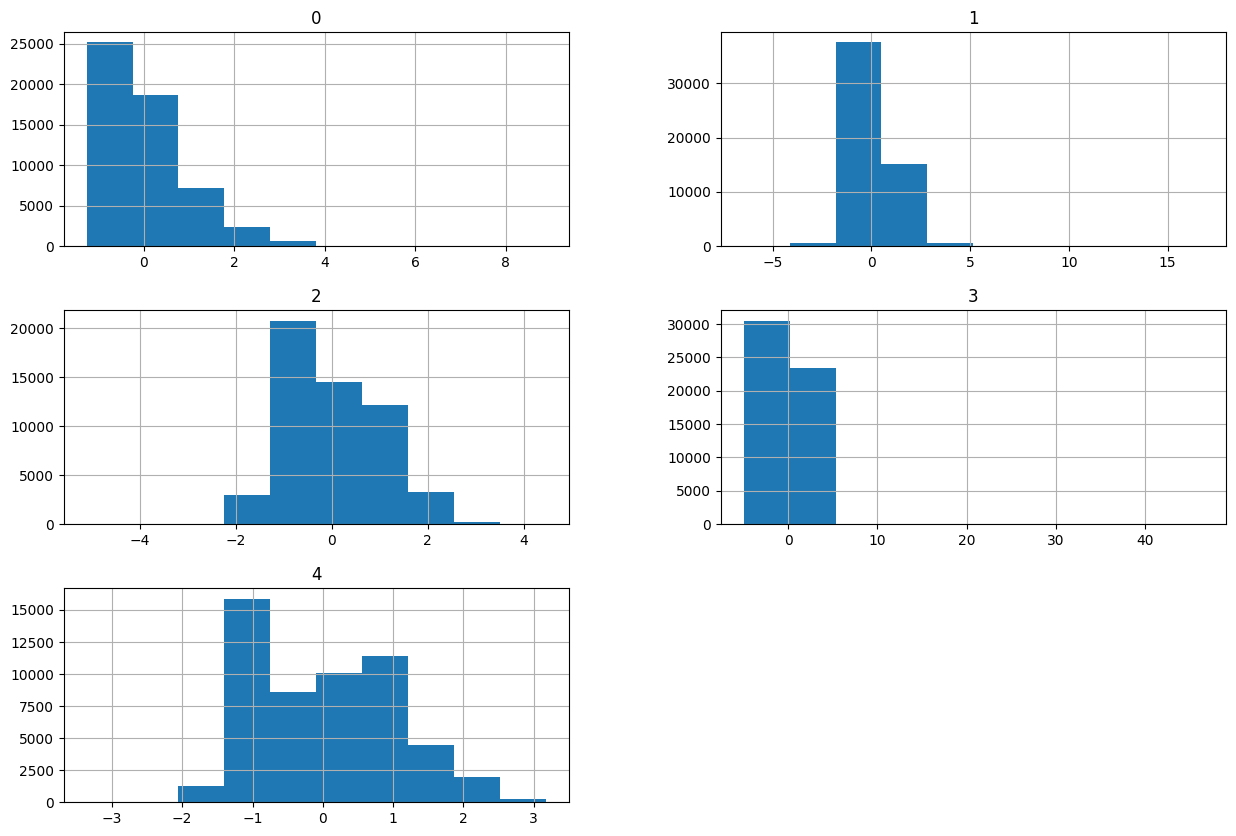

In [71]:
data1_sc.hist(figsize=(15,10))
plt.show()

## **min-max scaling**

In [72]:
data1.describe()

,carat,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,57.457719,5.731157,5.734526,3.539131
std,0.474011,2.234436,1.121761,1.142135,0.691776
min,0.200000,43.000000,0.000000,0.000000,1.215000
25%,0.400000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,59.000000,6.540000,6.540000,4.040000
max,5.010000,95.000000,10.740000,58.900000,5.735000


In [75]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
mm =  MinMaxScaler()
data1_mm = mm.fit_transform(data1)

In [78]:
data1_mm = pd.DataFrame(data1_mm)

In [79]:
data1_mm.describe()

,0,1,2,3,4
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.124312,0.278033,0.533627,0.097360,0.514188
std,0.098547,0.042970,0.104447,0.019391,0.153048
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041580,0.250000,0.438547,0.080136,0.375000
50%,0.103950,0.269231,0.530726,0.096944,0.512168
75%,0.174636,0.307692,0.608939,0.111036,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000


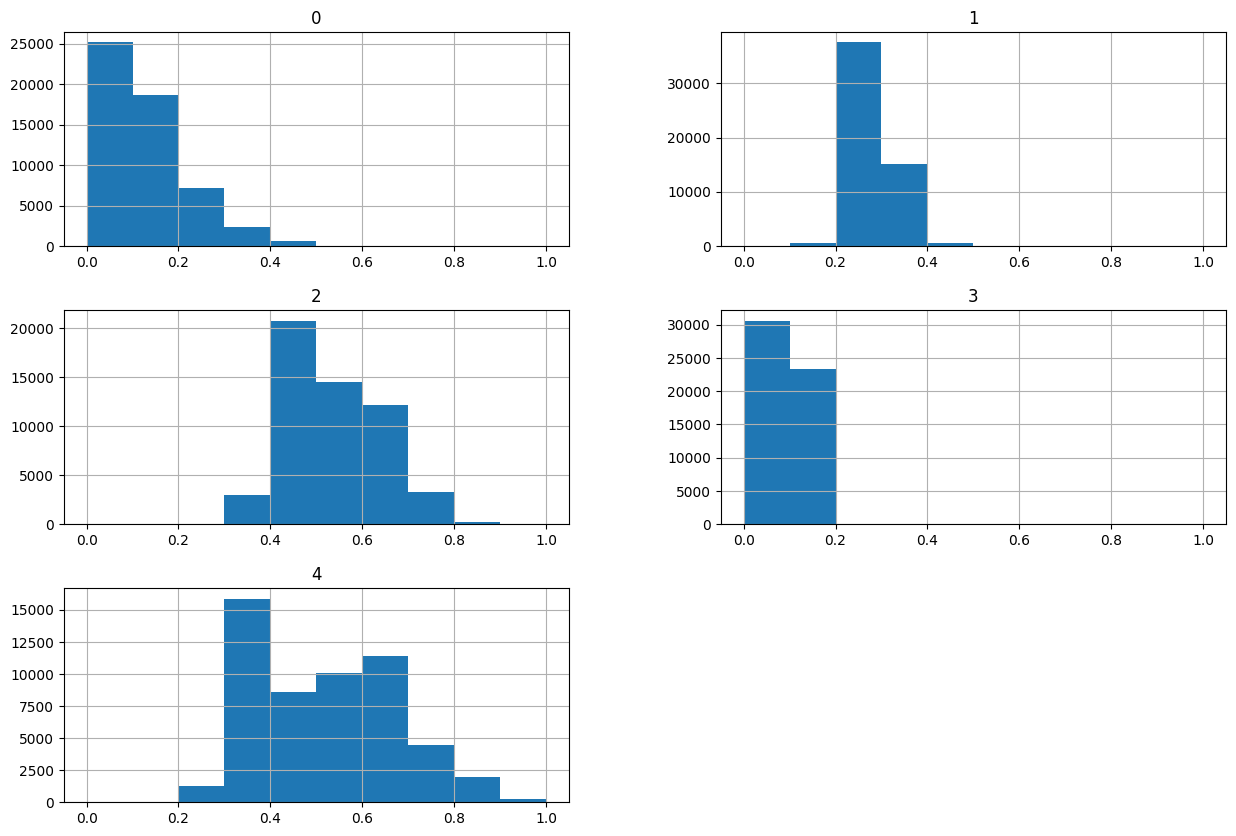

In [81]:
data1_mm.hist(figsize=(15,10))
plt.show()

## **Normalization**

In [82]:
data1_norm = sklearn.preprocessing.normalize(data1)

In [83]:
data1_norm = pd.DataFrame(data1_norm)

In [84]:
data1_norm.describe()

,0,1,2,3,4
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.013644,0.987837,0.098444,0.098502,0.060809
std,0.007952,0.004875,0.018400,0.018553,0.011447
min,0.003211,0.690185,0.000000,0.000000,0.018129
25%,0.006851,0.984728,0.081804,0.081976,0.050523
50%,0.012097,0.988597,0.097203,0.097300,0.060017
75%,0.018061,0.991957,0.112194,0.112133,0.069386
max,0.081645,0.999725,0.175024,0.713191,0.106051


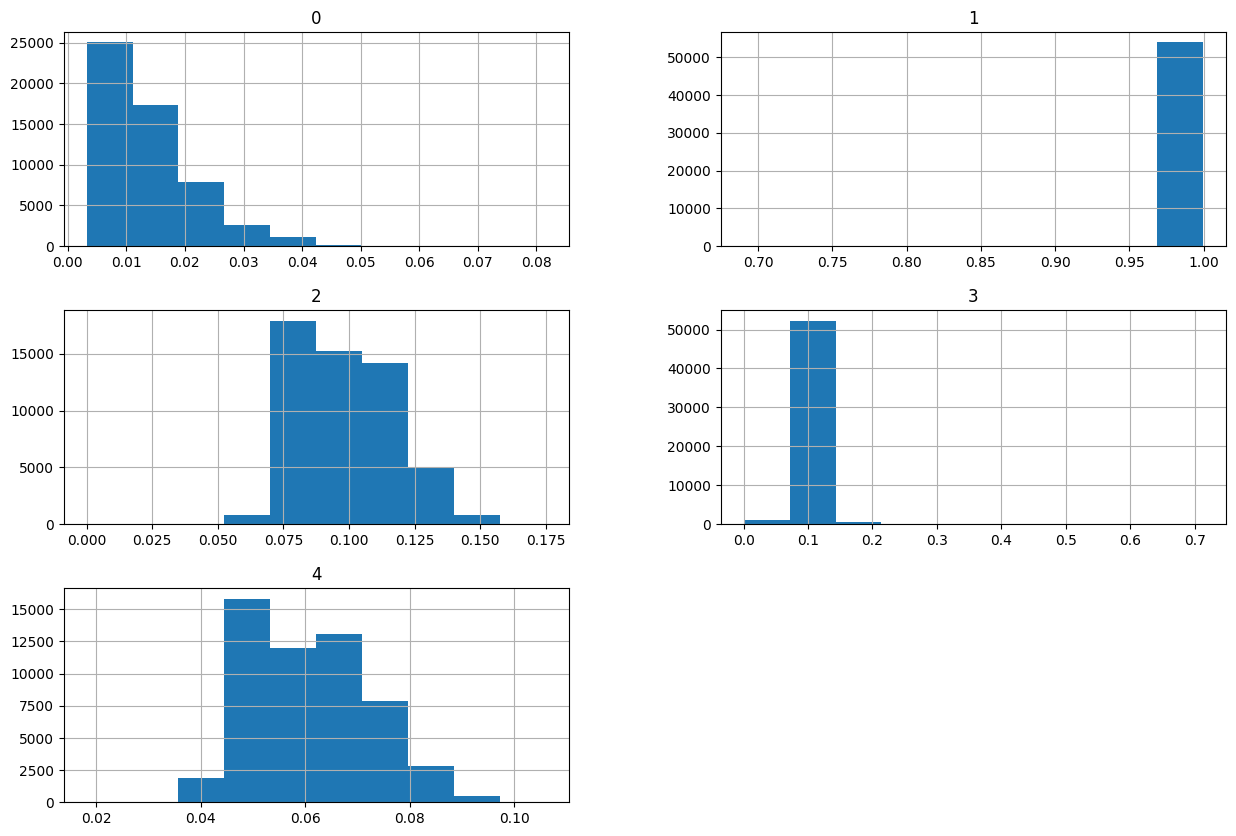

In [85]:
data1_norm.hist(figsize=(15,10))
plt.show()

## **Correlation**

In [86]:
data1.corr()

,carat,table,x,y,z
carat,1.000000,0.181573,0.975094,0.951722,0.973806
table,0.181573,1.000000,0.195337,0.183755,0.155383
x,0.975094,0.195337,1.000000,0.974701,0.990358
y,0.951722,0.183755,0.974701,1.000000,0.968563
z,0.973806,0.155383,0.990358,0.968563,1.000000


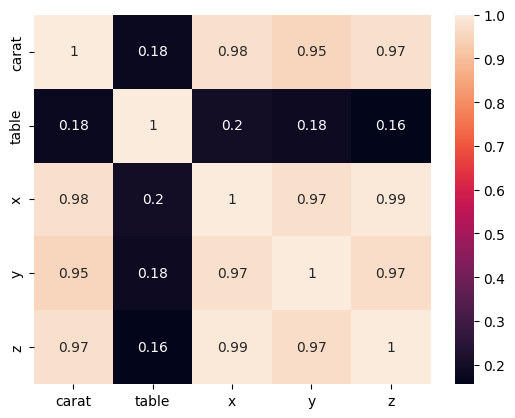

In [87]:
sns.heatmap(data1.corr(),annot=True)
plt.show()